# Outliers

Detectar __Outliers__ son una parte importa y crucial al momento de realizar __Data Analytics__. 

Según Wikipedia:

"En estadística, un __outliers__ es una observación que esta bastante alejada del resto de observaciones".

A partir de esto aparecen dos preguntas que tenemos que responder:

- ¿Cómo detectamos los outliers?
- ¿Qué hacemos cuando ya los encontramos?

### ¿Por qué detectar los outliers?

<img src="Images/impact_noise.jpeg" alt="New app" title="New app" width=800px height=500px/>

### ¿Son los Outliers lo mismo que el ruido?


<img src="Images/noise_outlier.png" alt="New app" title="New app" width=800px height=500px/>

### ¿Qué podemos hacer con los outliers?

- __Trimming__: Esta técnica excluye los valores outliers del análisis. 

- __Capping__: Se define un límite y se reduce al outliers a ese límite.

- __Outliers to missing value__: Se convierten los valores outliers en valores perdidos y son tratados como valores perdidos.

- __Discretization__: Se realizan grupos, los cuales pueden incluir a los outliers

## Trabajando con outliers

In [2]:

from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import scipy as sp
from sklearn.covariance import MinCovDet
import copy 

#Load data
X, y = load_boston(return_X_y=True)

#Create data frame
boston = load_boston()
columns = boston.feature_names
dfBoston = pd.DataFrame(X, columns = columns)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets incl

In [3]:
dfBoston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Variables
There are 14 attributes in each case of the dataset. They are:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per \$10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

<AxesSubplot: >

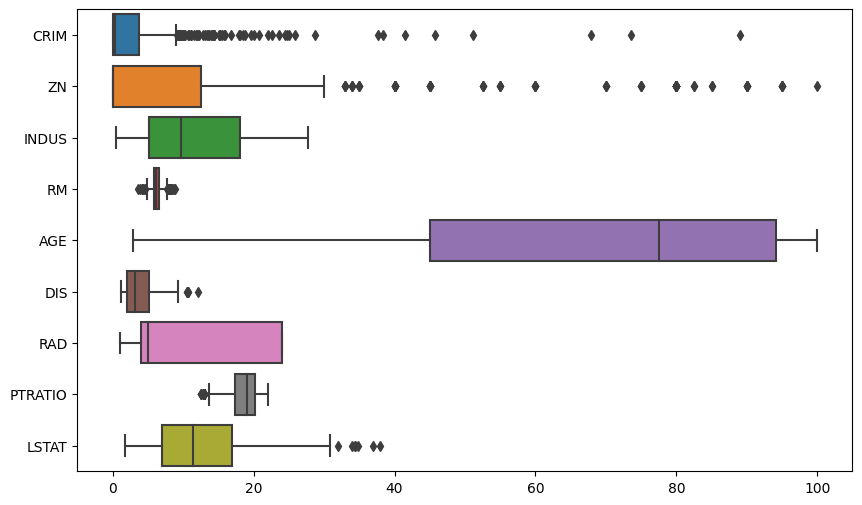

In [7]:
df_1 = dfBoston[['TAX', 'B']]
df_2 = dfBoston[['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO','LSTAT']]
df_3 = dfBoston[['CHAS', 'NOX']]


fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df_2, orient="h")

### Tukey's box plot method

<img src="Images/boxplot.png" alt="New app" title="New app" width=800px height=500px/>


IQR =Q3 - Q1, whereas q3 := 75th quartile and q1 := 25th quartile

Inner fence = [Q1-1.5*IQR, Q3+1.5*IQR]

Outer fence = [Q1–3*IQR, Q3+3*IQR]

In [8]:
#Tukey's method
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss
        
probable_outliers_tm, possible_outliers_tm = tukeys_method(dfBoston, "CRIM")
print("Probables outliers")
print(probable_outliers_tm)
# [374, 375, 376, 378, 379, 380, 381, 384, 385, 386, 387, 398, 400, 403, 404, 405, 406, 
# 410 412, 413, 414, 415, 417, 418, 425, 427, 437, 440, 468, 477]

print("Posibles outliers")
print(possible_outliers_tm)
# [367, 371, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 384, 385, 386, 387, 388, 
# 392, 394, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 409, 410, 411, 412, 413, 
# 414, 415, 416, 417, 418, 419, 420, 422, 425, 426, 427, 429, 431, 434, 435, 436, 437,
# 438, 439, 440, 441, 443, 444, 445, 447, 448, 454, 468, 469, 477, 478, 479]

Probables outliers
[374, 375, 376, 378, 379, 380, 381, 384, 385, 386, 387, 398, 400, 403, 404, 405, 406, 410, 412, 413, 414, 415, 417, 418, 425, 427, 437, 440, 468, 477]
Posibles outliers
[367, 371, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 384, 385, 386, 387, 388, 392, 394, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 422, 425, 426, 427, 429, 431, 434, 435, 436, 437, 438, 439, 440, 441, 443, 444, 445, 447, 448, 454, 468, 469, 477, 478, 479]


In [9]:
len(possible_outliers_tm)/dfBoston.shape[0]

0.13043478260869565

/var/folders/kn/7zp94d956m90kx6s3b45f1lm0000gn/T/ipykernel_3059/2720726029.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfBoston['CRIM'])


<AxesSubplot: xlabel='CRIM', ylabel='Density'>

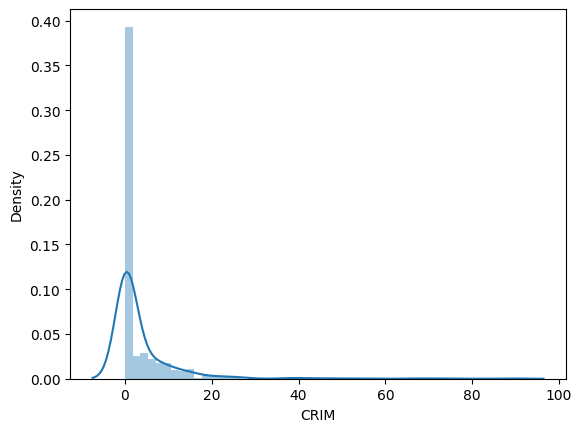

In [10]:
sns.distplot(dfBoston['CRIM'])

[]
[380, 404, 405, 410, 414, 418]


/var/folders/kn/7zp94d956m90kx6s3b45f1lm0000gn/T/ipykernel_3059/2717623630.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfBoston['CRIM_log'])


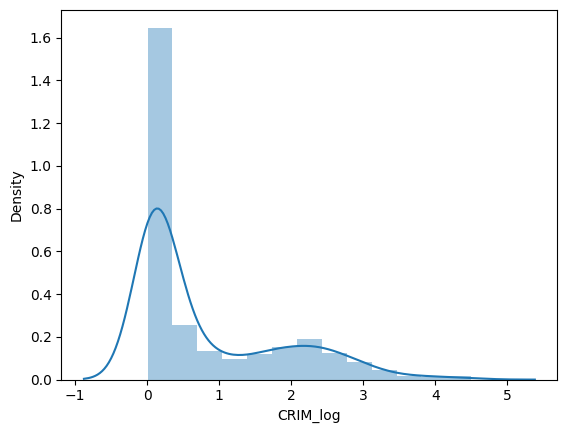

In [13]:
#Transform 'CRIM' to log 
log_CRIM = np.log(dfBoston['CRIM'])
dfBoston['CRIM_man'] = dfBoston['CRIM']+1
log_CRIM = np.log(dfBoston['CRIM_man'])
dfBoston['CRIM_log'] = log_CRIM

#Plot
sns.distplot(dfBoston['CRIM_log'])

#Calculate probable and possible outliers using log-iq method
probable_outliers_logiq, possible_outliers_logiq = tukeys_method(dfBoston, 'CRIM_log')
print(probable_outliers_logiq)
print(possible_outliers_logiq)

## Z - Score


<img src="Images/z_score.png" alt="New app" title="New app" width=400px height=200px/>

Según la teoría, if z > c, donde c normalmente es seteado como 3. Si se da el caso la observación es marcada como outlier.


<img src="Images/normal_distribution.png" alt="New app" title="New app" width=500px height=300px/>


In [16]:
stats.zscore(dfBoston['CRIM']).describe()

count    5.060000e+02
mean    -1.123388e-16
std      1.000990e+00
min     -4.197819e-01
25%     -4.109696e-01
50%     -3.906665e-01
75%      7.396560e-03
max      9.933931e+00
Name: CRIM, dtype: float64

In [15]:
dfBoston.shape

(506, 15)

In [17]:
dfBoston['CRIM_zscore'] = stats.zscore(dfBoston['CRIM'])

In [20]:
dfBoston.loc[abs(dfBoston['CRIM_zscore']) > 3]
# Valores outliers

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CRIM_man,CRIM_log,CRIM_zscore
380,88.9762,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21,89.9762,4.499545,9.933931
398,38.3518,0.0,18.1,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59,39.3518,3.672542,4.042606
404,41.5292,0.0,18.1,0.0,0.693,5.531,85.4,1.6074,24.0,666.0,20.2,329.46,27.38,42.5292,3.750191,4.412370
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,68.9208,4.232958,7.483646
410,51.1358,0.0,18.1,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,52.1358,3.953852,5.530321
414,45.7461,0.0,18.1,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,46.7461,3.844731,4.903104
418,73.5341,0.0,18.1,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62,74.5341,4.311257,8.136884
427,37.6619,0.0,18.1,0.0,0.679,6.202,78.7,1.8629,24.0,666.0,20.2,18.82,14.52,38.6619,3.654855,3.962320


In [ ]:
#Internally studentized method (z-score)
def z_score_method(df, variable_name):
    #Takes two parameters: dataframe & variable of interest as string
    columns = df.columns
    z = np.abs(stats.zscore(df))
    threshold = 3
    outlier = []
    index=0
    for item in range(len(columns)):
        if columns[item] == variable_name:
            index = item
    for i, v in enumerate(z[:, index]):
        if v > threshold:
            outlier.append(i)
        else:
            continue
    return outlier

outlier_z = z_score_method(dfBoston, 'CRIM')
print(outlier_z)
# [380, 398, 404, 405, 410, 414, 418, 427]

## Median Absolute Deviation Method


<img src="Images/mad.png" alt="New app" title="New app" width=400px height=200px/>

In [4]:
#MAD method
def mad_method(df, variable_name):
    #Takes two parameters: dataframe & variable of interest as string
    columns = df.columns
    med = np.median(df, axis = 0)
    mad = np.abs(stats.median_absolute_deviation(df))
    threshold = 4
    outlier = []
    valor = []
    index=0
    for item in range(len(columns)):
        if columns[item] == variable_name:
            index == item
    for i, v in enumerate(df.loc[:,variable_name]):
        t = (v-med[index])/mad[index]
        if t > threshold:
            outlier.append(i)
        else:
            continue
    return outlier

outlier_mad = mad_method(dfBoston, 'CRIM')
print(len(outlier_mad))

AttributeError: module 'scipy.stats' has no attribute 'median_absolute_deviation'

In [35]:
dfBoston['CRIM'].describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

In [34]:
print(outlier_mad)

[20, 31, 32, 34, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 171, 310, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487]


In [30]:
outlier_mad

[20,
 31,
 32,
 34,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 153,
 154,
 155,
 156,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 171,
 310,
 356,
 357,
 358,
 359,
 360,
 361,
 362,
 363,
 364,
 365,
 366,
 367,
 368,
 369,
 370,
 371,
 372,
 373,
 374,
 375,
 376,
 377,
 378,
 379,
 380,
 381,
 382,
 383,
 384,
 385,
 386,
 387,
 388,
 389,
 390,
 391,
 392,
 393,
 394,
 395,
 396,
 397,
 398,
 399,
 400,
 401,
 402,
 403,
 404,
 405,
 406,
 407,
 408,
 409,
 410,
 411,
 412,
 413,
 414,
 415,
 416,
 417,
 418,
 419,
 420,
 421,
 422,
 423,
 424,
 425,
 426,
 427,
 428,
 429,
 430,
 431,
 432,
 433,
 434,
 435,
 436,
 437,
 438,
 439,
 440,
 441,
 442,
 443,
 444,
 445,
 446,
 447,
 448,
 449,
 450,
 451,
 452,
 453,
 454,
 455,
 456,
 457,
 458,
 459,
 460,
 461,
 462,
 463,
 464,
 465,
 466,
 467,
 468,
 469,
 470,
 471,
 472,
 473,
 474,
 475,
 476,
 477,
 478,
 479,
 480,
 481,
 482,
 483,
 484,
 485,
 486,
 487]

In [27]:
dfBoston['CRIM'].describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

# Detectando outliers multivariables

# Visualización

La forma más común de detectar outliers es usando __scatter plots__.  Los __scatterplots__ nos ayudan a encontrar la relación entre dos variables (numericas).

Entre las ventajas que tiene visualizar los datos, es que es sencillo encontrar los outliers de forma visual. Mientras que entre las desventajas que tenemos es que se complica cuando se quiera encontrar la relación entre más de dos variables y cuando buscamos marcar los outliers encontrados.

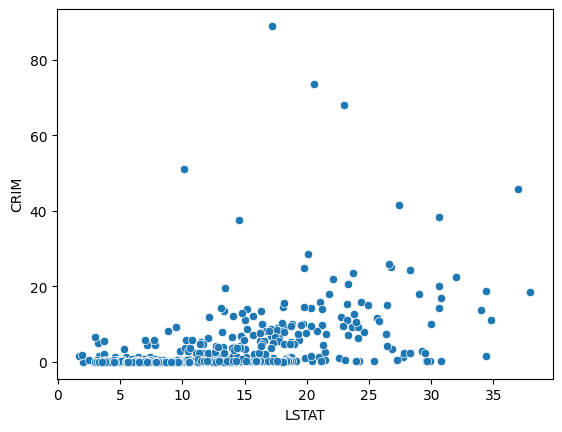

In [5]:

#Scatterpblot
ax = sns.scatterplot(x="LSTAT", y="CRIM", data=dfBoston)

### Mahalanobis Distance

La distancia de Mahalanobis nos ayuda a encontrar la distancia de un elemento x hacia una distribución D. Esta distancia es una generalización del método (Z-score). En sencillo la distancia de Mahalanobis define cuantas desviaciones estandar el elemento x esta alejando del promedio de la distribución D.



<img src="Images/mahalanobis_distance.png" alt="New app" title="New app" width=400px height=200px/>

Donde:

X: representa un vector del registro
u: representa el vector promedio de las variables independientes.
C(-1): inversa de la matriz de covarianza

Para definir el punto de corte se asume lo siguiente:

La distribución de la data es una distribución normal con K variables, entonces la DM sigue una distribución chi cuadrado con K grados de libertad. 


<img src="Images/punto_corte_mahalanobis.png" alt="New app" title="New app" width=400px height=200px/>

In [7]:
#Mahalonibis Distance

def mahalanobis_method(df):
    #M-Distance
    x_minus_mu = df - np.mean(df)
    cov = np.cov(df.values.T)                           #Covariance
    inv_covmat = sp.linalg.inv(cov)                     #Inverse covariance
    left_term = np.dot(x_minus_mu, inv_covmat) 
    mahal = np.dot(left_term, x_minus_mu.T)
    md = np.sqrt(mahal.diagonal())
    
    #print(md)
    
    #Flag as outlier
    outlier = []
    #Cut-off point
    C = np.sqrt(stats.chi2.ppf((1-0.001), df=df.shape[1]))    #degrees of freedom = number of variables
    for index, value in enumerate(md):
        if value > C:
            outlier.append(index)
        else:
            continue
    return outlier, md


df_bivariate = dfBoston[['LSTAT', 'CRIM']]
outliers_mahal_bi, md_bi = mahalanobis_method(df=df_bivariate)
#[380, 398, 404, 405, 410, 414, 418, 427]

outliers_mahal, md = mahalanobis_method(df=dfBoston)
#[152, 155, 214, 353, 364, 365, 367, 380, 405, 410, 414, 418, 488, 489, 490, 491, 492]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [38]:
outliers_mahal_bi

[380, 398, 404, 405, 410, 414, 418, 427]

In [48]:
len(outliers_mahal)

317

In [44]:
dfBoston.shape[0]

506

## Robust Mahalanobis Distance

La covarianza de determinante minimo (MCD) permite calcular las estimaciones de u y C de forma robusta a partir de usar un subconjunto de registros.

In [50]:
#Robust Mahalonibis Distance
def robust_mahalanobis_method(df):
    #Minimum covariance determinant
    rng = np.random.RandomState(0)
    real_cov = np.cov(df.values.T)
    X = rng.multivariate_normal(mean=np.mean(df, axis=0), cov=real_cov, size=506)
    cov = MinCovDet(random_state=0).fit(X)
    mcd = cov.covariance_ #robust covariance metric
    robust_mean = cov.location_  #robust mean
    inv_covmat = sp.linalg.inv(mcd) #inverse covariance metric
    
    #Robust M-Distance
    x_minus_mu = df - robust_mean
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    md = np.sqrt(mahal.diagonal())
    
    #Flag as outlier
    outlier = []
    C = np.sqrt(stats.chi2.ppf((1-0.001), df=df.shape[1]))#degrees of freedom = number of variables
    for index, value in enumerate(md):
        if value > C:
            outlier.append(index)
        else:
            continue
    return outlier, md

outliers_mahal_rob_bi, md_rb_bi = robust_mahalanobis_method(df=df_bivariate)
#[141, 374, 380, 398, 404, 405, 410, 414, 418, 427]

outliers_mahal_rob, md_rb = robust_mahalanobis_method(df=dfBoston)
#[123, 126, 142, 152, 155, 163, 214, 283, 353, 364, 365, 367, 380, 405, 410, 
# 418, 488, 489, 490, 491, 492]

/Users/dennis/virtualenvs/jupyter/lib/python3.7/site-packages/sklearn/covariance/_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-1.896874865097542 > -1.916831817043082). You may want to try with a higher value of support_fraction (current value: 0.516).
  RuntimeWarning)
/Users/dennis/virtualenvs/jupyter/lib/python3.7/site-packages/sklearn/covariance/_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-1.756743694396548 > -1.759418957444407). You may want to try with a higher value of support_fraction (current value: 0.516).
  RuntimeWarning)
/Users/dennis/virtualenvs/jupyter/lib/python3.7/site-packages/sklearn/covariance/_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-1.725995025914923 > -1.800130378263940). You may want to try with a higher value of support_frac

/Users/dennis/virtualenvs/jupyter/lib/python3.7/site-packages/sklearn/covariance/_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-1.933955964904158 > -1.972398958602541). You may want to try with a higher value of support_fraction (current value: 0.516).
  RuntimeWarning)
/Users/dennis/virtualenvs/jupyter/lib/python3.7/site-packages/sklearn/covariance/_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-1.731437125369810 > -1.975043210961681). You may want to try with a higher value of support_fraction (current value: 0.516).
  RuntimeWarning)
/Users/dennis/virtualenvs/jupyter/lib/python3.7/site-packages/sklearn/covariance/_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-1.865357703303184 > -1.923922790781543). You may want to try with a higher value of support_frac

In [51]:
print(outliers_mahal_rob_bi)

[141, 380, 398, 404, 405, 410, 414, 418, 427]


In [52]:
print(outliers_mahal_rob)

[142, 152, 155, 163, 283, 353, 364, 365, 367, 380, 405, 410, 418, 488, 489, 490, 491, 492]


In [ ]:
#Visualization
#You need deep copy otherwise cannot 
#add column to a slice of a DataFrame
df_bi_cp = copy.deepcopy(df_bivariate) 

#Add md and robust md to copy of dataframe
df_bi_cp['md'] = md_bi
df_bi_cp['md_robust'] = md_rb_bi

def flag_outliers(df, outliers):
    flag = []
    for index in range(df.shape[0]):
        if index in outliers:
            flag.append(1)
        else:
            flag.append(0)
    return flag

#Flag outliers with 1, others with 0
df_bi_cp['flag'] = flag_outliers(df_bivariate, outliers_mahal_bi)
df_bi_cp['flag_rob'] = flag_outliers(df_bivariate, outliers_mahal_rob_bi)




In [ ]:
#MD classic
ax = sns.scatterplot(x="LSTAT", y="CRIM", hue='flag', data=df_bi_cp)

In [ ]:
#MD robust
ax = sns.scatterplot(x="LSTAT", y="CRIM", hue='flag_rob', data=df_bi_cp)

## DBSCAN

<AxesSubplot: xlabel='LSTAT', ylabel='CRIM'>

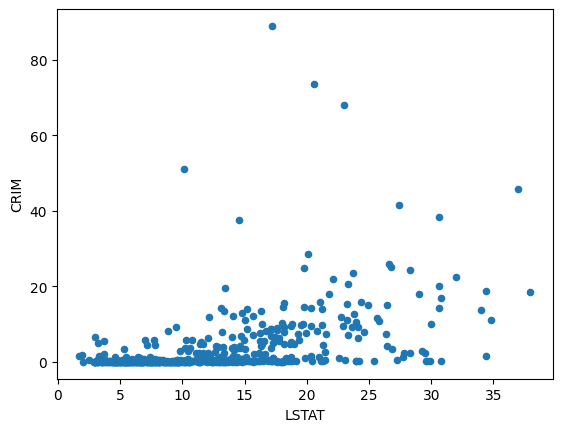

In [8]:
df_bivariate.plot.scatter(x = "LSTAT", y = "CRIM")

<AxesSubplot: xlabel='LSTAT', ylabel='CRIM'>

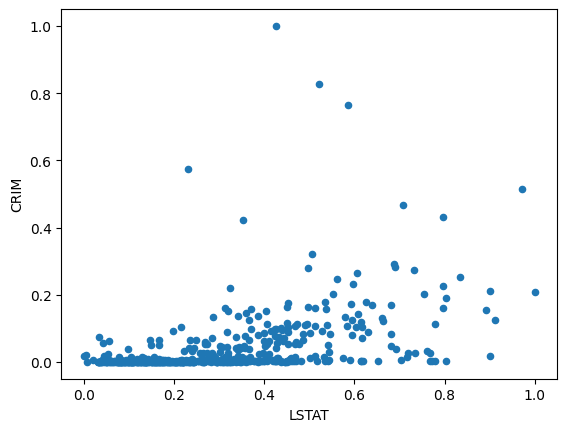

In [9]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaler.fit(df_bivariate)
df_bivariate_scaler = scaler.transform(df_bivariate)
#ageAndFare = scaler.fit_transform(ageAndFare)
df_bivariate_scaler = pd.DataFrame(df_bivariate_scaler, columns = ["LSTAT", "CRIM"])
df_bivariate_scaler.plot.scatter(x = "LSTAT", y = "CRIM")

In [10]:
from sklearn.cluster import DBSCAN

outlier_detection = DBSCAN(
  eps = 0.05,
  metric="euclidean",
  min_samples = 3,
  n_jobs = -1)
clusters = outlier_detection.fit_predict(df_bivariate_scaler)

In [11]:
df_bivariate_scaler['cluster'] = clusters

In [12]:
df_bivariate_scaler['cluster'].value_counts()

 0    481
-1     17
 1      5
 2      3
Name: cluster, dtype: int64

<AxesSubplot: xlabel='LSTAT', ylabel='CRIM'>

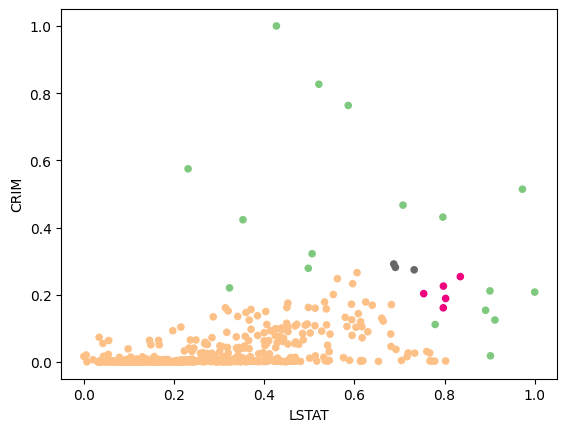

In [13]:
from matplotlib import cm
cmap = cm.get_cmap('Accent')
df_bivariate_scaler.plot.scatter(
  x = "LSTAT",
  y = "CRIM",
  c = clusters,
  cmap = cmap,
  colorbar = False
)